In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('diabetes.csv')

In [5]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

numerical_columns = df.columns[df.columns != 'Outcome']

df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])
df[numerical_columns] = median_imputer.fit_transform(df[numerical_columns])
df[numerical_columns] = mode_imputer.fit_transform(df[numerical_columns])


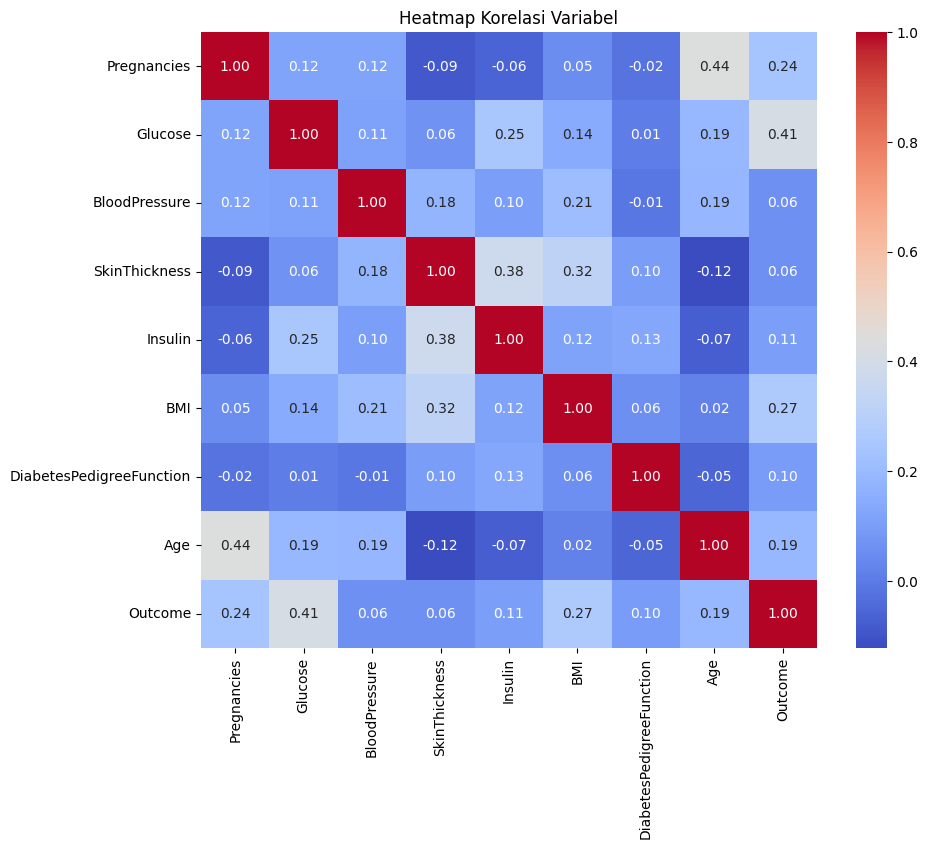

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Heatmap Korelasi Variabel")
plt.show()

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [12]:

X = df.drop('Outcome', axis=1)  # Fitur (tanpa kolom 'Outcome')
y = df['Outcome']               # Target (kolom 'Outcome')

print(X.head())
print(y.head())

# Menyeimbangkan data menggunakan RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)



   Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0          6.0  120.462481           72.0           35.0      0.0  31.99368   
1          1.0   85.000000           66.0           29.0      0.0  31.99368   
2          8.0  183.000000           64.0            0.0      0.0  23.30000   
3          1.0   89.000000           66.0           23.0     94.0  28.10000   
4          0.0  120.462481           40.0           35.0    168.0  43.10000   

   DiabetesPedigreeFunction        Age  
0                627.000000  33.166124  
1                351.000000  31.000000  
2                672.000000  32.000000  
3                167.000000  21.000000  
4                352.519614  33.000000  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [13]:
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_resampled)

minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_robust_scaled)

df_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)
df_scaled['Outcome'] = y_resampled.reset_index(drop=True)


print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
1     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
2     0.176471  0.557789       0.508772       0.313131  0.081031  0.439642   
3     0.117647  0.648241       0.736842       0.000000  0.000000  0.417288   
4     0.411765  0.512563       0.649123       0.404040  0.141581  0.554396   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.225127  0.176471        0  
1                  0.675586  0.078431        0  
2                  0.000341  0.019608        0  
3                  0.293315  0.117647        0  
4                  0.210662  0.238551        0  
